# Fluxo de caixa descontado

Projeto: Abordagens de aprendizado de máquina aplicado ao reconhecimento de padrões não-lineares: Classificação do desempenho de pneus em processos de manufatura inteligente.  

Professores: Ricardo Kalid; Ricardo Uchoa; Rilton Primo

Aluno: Rodrigo Marcel Araujo Oliveira

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import numpy_financial as npf

### Recursos necessários para o investimento inicial 
#### Custos durante o primeiro ano

Custo médio do computador: R$ 5.000 

Custo médio do salário do pesquisador 1 (professor universitário): R$ 15.000

Custo médio do salário do pesquisador 2 (universitário): R$ 2.000

Custo médio do salário do desenvolvedor de software: R$ 10.000

Custo médio do aluguel do escritório: R$ 8.000

Custo médio por hora de treinamentos: R$ 250

Custo com patente (Advogados, etc): R$ 80.000

In [31]:
recursos = {'Descrição dos recursos': ["Computador", "Pesquisador", "Desenvolvedor de software",  "Escritório", "Treinamentos" , "Custos com Patente", "Total"], 
            'Quantidade de recursos': [7, 2, 3, 1, 10, 1, 23], 
            'Custo médio de aquisição':[5000, 8500, 10000, 8000, 250, 80000, 111750],
            'Custo total de aquisição':[35000, 17000, 30000, 8000, 2500, 80000, 172500]
            }
df = pd.DataFrame(data=recursos)

df.style.background_gradient(cmap='BuGn')

,Descrição dos recursos,Quantidade de recursos,Custo médio de aquisição,Custo total de aquisição
0,Computador,7,5000,35000
1,Pesquisador,2,8500,17000
2,Desenvolvedor de software,3,10000,30000
3,Escritório,1,8000,8000
4,Treinamentos,10,250,2500
5,Custos com Patente,1,80000,80000
6,Total,23,111750,172500


Investimento para o primeiro ano:

In [6]:
I = 172500*12
I

2070000

### Criando dataset com investimento inicial

In [37]:
anos=['2022', '2023', '2024', '2025', '2026', '2027']
investimento = pd.Series(index=anos)
investimento['2022'] = -I
for ano in range(1, 6):
    investimento[ano] = 0 

investimento

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


2022   -2070000.0
2023          0.0
2024          0.0
2025          0.0
2026          0.0
2027          0.0
dtype: float64

### Criando dataset com a receita do ano corrente

In [38]:
receita = pd.Series(index=anos)
receita['2022'] = 0
receita['2023'] = 10000000
for ano in range(2, 6):
    receita[ano] = 0 

receita

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


2022           0.0
2023    10000000.0
2024           0.0
2025           0.0
2026           0.0
2027           0.0
dtype: float64

### Simulação com taxa de acrescimento constante de 5% ao ano

Esse crescimento está correlacionado ao poder preditivo do modelo de desempenho dos pneus. 

In [39]:
tx_cresc = 0.05
for ano in range(2, 6):
    receita[ano] = receita[ano - 1] * (1 + tx_cresc) 
receita

2022           0.0
2023    10000000.0
2024    10500000.0
2025    11025000.0
2026    11576250.0
2027    12155062.5
dtype: float64

### Simulação da avaliação do fluxo de caixa

In [40]:
def fluxo_de_caixa_descontado(ano_inicial, ebitda_margin, depr_tx, amort_tx, nwc_tx, capex_tx, tx_imposto, receita, investimento):
    # Margem EBITDA = (lucro antes de juros e impostos + depreciação + amortização) / receita total
    # ebitda_margin *
    # Fator de depreciação
    # depr_tx *
    # Fator de amortização
    # amort_tx = 0.005

    # EBITDA = lucro operacional líquido + depreciações + amortizações (*)
    ebitda = receita*ebitda_margin

    depreciacao = receita*depr_tx
    amortizacao = receita*amort_tx

    # Lucro Operacional Líquido (EBIT) = Lucro Bruto – despesas operacionais + receitas operacionais (*)
    ebit = ebitda - depreciacao - amortizacao

    #nwc_tx  # % 
    # Capital de Giro Líquido = Contas a Receber + Estoque + Investimentos Comercializáveis ​​- Contas a Pagar Comercial
    nwc = receita * nwc_tx 
    # Mudança no Capital de Giro Líquido = Capital de Giro Líquido do Período Atual - Capital de Giro Líquido do Período Anterior
    v_nwc  = nwc.shift(1) - nwc 
    v_nwc[str(ano_inicial+1)] = 0#v_nwc[2]*(0.95)
    v_nwc[str(ano_inicial)] = 0
    #Despesas de capital (CapEx) =  ativo imobilizado (período atual) -  ativo imobilizado (período anterior) + depreciacao (período atual)
    # capex_tx = 0.001
    capex = -(receita * capex_tx)

    #IR aplicamos uma pequena função para garantir que em cenários em que o lucro antes dos impostos se torne negativo, não teremos um pagamento de imposto positivo.
    # tx_imposto *
    impostos = -ebit * tx_imposto
    impostos = impostos.apply(lambda x: min(x, 0))

    fluxo_de_caixa = ebit + depreciacao + amortizacao + impostos + capex + v_nwc + investimento

    dados = pd.DataFrame([investimento, receita, ebit, depreciacao , amortizacao,  impostos,  capex,  nwc, v_nwc, fluxo_de_caixa],
                        index=['Investimento Inicial', 'Receita', 'EBIT', 'Depreciacao', 'Amortizacao', 'Impostos', 'Capex', 'Capital de giro ', 'Margem do capital de giro', 'Fluxo de caixa']).round(1)
    dados.replace(-0,0, inplace=True)
    return dados

In [41]:
DFC = fluxo_de_caixa_descontado(ano_inicial=2022, ebitda_margin = 0.12, depr_tx = 0.005, amort_tx = 0.005, nwc_tx = 0.15, capex_tx = 0.01, tx_imposto = 0.25, receita=receita, investimento=investimento)
DFC

,2022,2023,2024,2025,2026,2027
Investimento Inicial,-2070000.0,0.0,0.0,0.0,0.0,0.0
Receita,0.0,10000000.0,10500000.0,11025000.0,11576250.0,12155062.5
EBIT,0.0,1100000.0,1155000.0,1212750.0,1273387.5,1337056.9
Depreciacao,0.0,50000.0,52500.0,55125.0,57881.2,60775.3
Amortizacao,0.0,50000.0,52500.0,55125.0,57881.2,60775.3
Impostos,0.0,-275000.0,-288750.0,-303187.5,-318346.9,-334264.2
Capex,0.0,-100000.0,-105000.0,-110250.0,-115762.5,-121550.6
Capital de giro,0.0,1500000.0,1575000.0,1653750.0,1736437.5,1823259.4
Margem do capital de giro,0.0,0.0,-75000.0,-78750.0,-82687.5,-86821.9
Fluxo de caixa,-2070000.0,825000.0,791250.0,830812.5,872353.1,915970.8


In [42]:
DFC_I = DFC.filter(items = ['Fluxo de caixa'], axis=0)
DFC_I = DFC_I.transpose()
DFC_I.reset_index(inplace=True)
DFC_I.rename(columns={'index': 'Ano'}, inplace=True)

wacc = 0.14 # taxa de desconto, isto é, representa o custo de capital, portanto a taxa de atratividade está contida no wacc
DFC_I['VP'] = npf.pv(rate=wacc, pmt=0, nper=DFC_I.index, fv=-DFC_I['Fluxo de caixa'])
DFC_I['VPC'] = np.cumsum(DFC_I['VP'])
DFC_I

,Ano,Fluxo de caixa,VP,VPC
0,2022,-2070000.0,-2.070000e+06,-2.070000e+06
1,2023,825000.0,7.236842e+05,-1.346316e+06
2,2024,791250.0,6.088412e+05,-7.374746e+05
3,2025,830812.5,5.607748e+05,-1.766998e+05
4,2026,872353.1,5.165031e+05,3.398032e+05
5,2027,915970.8,4.757265e+05,8.155298e+05


VPL

$$
V_{PL}= \sum_{n=1}^{n=N} \frac{Fc_{t}}{(1+i)^t} 
$$

Onde:

VPL = Valor Presente Líquido

FC = fluxo de caixa

t = momento em que o fluxo de caixa 

i = taxa mínima de atratividade

n = período de tempo


In [68]:
vpl = npf.npv(0.14, DFC_I['Fluxo de caixa'])
vpl = vpl.astype(int)
print("VPL: R$ " + str(vpl))

VPL: R$ 815529


Taxa interna de retorno (TIR) 

In [44]:
flx= np.array(list(DFC_I['VP']))
tir = npf.irr(flx)
print("TIR: " + str(round(tir*100, 2)) + "%")

TIR: 13.23%


 ROI: Lucro líquido / Investimento total 

In [45]:
invest = -investimento[0]
roi = ((vpl)/invest)
roi
print("ROI: " + str(round(roi*100, 2)) + "%")

ROI: 54.24%


In [46]:
payback = DFC_I[DFC_I['VPC'] > 0].Ano.values[0]
payback

'2026'

## Abordagem probabilística da avaliação do fluxo de caixa 

### Processo de Monte Carlo

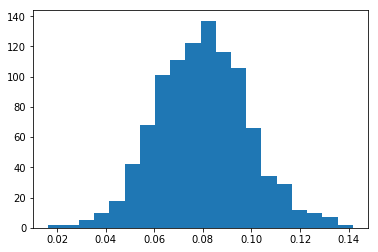

In [47]:
n_interacoes = 1000

cresc_rate_dist =np.random.normal(loc=0.08, scale=0.02, size=n_interacoes)

plt.hist(cresc_rate_dist, bins=20)
plt.show()

Cenário pessimista - percentil de 5%

In [49]:
tx_cresc_pessimista = np.percentile(cresc_rate_dist, 5)
tx_cresc_pessimista

0.04997110194405137

In [54]:
def receita_anual(tx_cresc):
    receita = pd.Series(index=anos)
    receita['2022'] = 0
    receita['2023'] = 10000000
    for ano in range(2, 6):
        receita[ano] = 0 

    for ano in range(2, 6):
        receita[ano] = receita[ano - 1] * (1 + tx_cresc) 

    return receita    

def indicadores(DFC):

    DFC_I = DFC.filter(items = ['Fluxo de caixa'], axis=0)
    DFC_I = DFC_I.transpose()
    DFC_I.reset_index(inplace=True)
    DFC_I.rename(columns={'index': 'Ano'}, inplace=True)
    wacc = 0.1 # taxa de desconto, isto é, representa o custo de capital, portanto a taxa de atratividade está contida no wacc
    DFC_I['VP'] = npf.pv(rate=wacc, pmt=0, nper=DFC_I.index, fv=-DFC_I['Fluxo de caixa'])
    DFC_I['VPC'] = np.cumsum(DFC_I['VP'])
    print(DFC_I)

    VPL = npf.npv(0.14, DFC_I['Fluxo de caixa'])
    VPL = VPL.astype(int)
    print("VPL: R$ " + str(VPL))

    flx= np.array(list(DFC_I['Fluxo de caixa']))
    tir = npf.irr(flx)
    print("TIR: " + str(round(tir*100, 2)) + "%")

    invest = -investimento[0]
    roi = ((VPL)/invest)
    print("ROI: " + str(round(roi*100, 2)) + "%")

    payback = DFC_I[DFC_I['VPC'] > 0].Ano.values[0]
    print("Payback: " + str(payback))


In [55]:
receita = receita_anual(tx_cresc_pessimista)
receita

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


2022    0.000000e+00
2023    1.000000e+07
2024    1.049971e+07
2025    1.102439e+07
2026    1.157529e+07
2027    1.215372e+07
dtype: float64

In [56]:
DFC = fluxo_de_caixa_descontado(ano_inicial=2022, ebitda_margin = 0.12, depr_tx = 0.002, amort_tx = 0.001, nwc_tx = 0.2, capex_tx = 0.01, tx_imposto = 0.20, receita=receita, investimento=investimento)
DFC

,2022,2023,2024,2025,2026,2027
Investimento Inicial,-2070000.0,0.0,0.0,0.0,0.0,0.0
Receita,0.0,10000000.0,10499711.0,11024393.1,11575294.2,12153724.4
EBIT,0.0,1170000.0,1228466.2,1289854.0,1354309.4,1421985.8
Depreciacao,0.0,20000.0,20999.4,22048.8,23150.6,24307.4
Amortizacao,0.0,10000.0,10499.7,11024.4,11575.3,12153.7
Impostos,0.0,-234000.0,-245693.2,-257970.8,-270861.9,-284397.2
Capex,0.0,-100000.0,-104997.1,-110243.9,-115752.9,-121537.2
Capital de giro,0.0,2000000.0,2099942.2,2204878.6,2315058.8,2430744.9
Margem do capital de giro,0.0,0.0,-99942.2,-104936.4,-110180.2,-115686.0
Fluxo de caixa,-2070000.0,866000.0,809332.8,849776.0,892240.3,936826.5


In [57]:
indicadores(DFC)

    Ano  Fluxo de caixa            VP           VPC
0  2022      -2070000.0 -2.070000e+06 -2.070000e+06
1  2023        866000.0  7.872727e+05 -1.282727e+06
2  2024        809332.8  6.688701e+05 -6.138572e+05
3  2025        849776.0  6.384493e+05  2.459210e+04
4  2026        892240.3  6.094121e+05  6.340042e+05
5  2027        936826.5  5.816955e+05  1.215700e+06
VPL: R$ 900815
TIR: 30.66%
ROI: 43.52%
Payback: 2025


Cenário intermediário

In [58]:
tx_cresc_intermediario = np.percentile(cresc_rate_dist, 50)
tx_cresc_intermediario

0.0797238173041951

In [59]:
receita = receita_anual(tx_cresc_intermediario)
DFC = fluxo_de_caixa_descontado(ano_inicial=2022, ebitda_margin = 0.12, depr_tx = 0.002, amort_tx = 0.001, nwc_tx = 0.2, capex_tx = 0.01, tx_imposto = 0.2, receita=receita, investimento=investimento)
DFC

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,2022,2023,2024,2025,2026,2027
Investimento Inicial,-2070000.0,0.0,0.0,0.0,0.0,0.0
Receita,0.0,10000000.0,10797238.2,11658035.2,12587458.3,13590978.5
EBIT,0.0,1170000.0,1263276.9,1363990.1,1472732.6,1590144.5
Depreciacao,0.0,20000.0,21594.5,23316.1,25174.9,27182.0
Amortizacao,0.0,10000.0,10797.2,11658.0,12587.5,13591.0
Impostos,0.0,-234000.0,-252655.4,-272798.0,-294546.5,-318028.9
Capex,0.0,-100000.0,-107972.4,-116580.4,-125874.6,-135909.8
Capital de giro,0.0,2000000.0,2159447.6,2331607.0,2517491.7,2718195.7
Margem do capital de giro,0.0,0.0,-159447.6,-172159.4,-185884.6,-200704.0
Fluxo de caixa,-2070000.0,866000.0,775593.2,837426.4,904189.3,976274.7


In [60]:
indicadores(DFC)

    Ano  Fluxo de caixa            VP           VPC
0  2022      -2070000.0 -2.070000e+06 -2.070000e+06
1  2023        866000.0  7.872727e+05 -1.282727e+06
2  2024        775593.2  6.409861e+05 -6.417412e+05
3  2025        837426.4  6.291708e+05 -1.257031e+04
4  2026        904189.3  6.175735e+05  6.050032e+05
5  2027        976274.7  6.061898e+05  1.211193e+06
VPL: R$ 894081
TIR: 30.39%
ROI: 43.19%
Payback: 2026


Cenário otimista

In [61]:
tx_cresc_otimista = np.percentile(cresc_rate_dist, 80)
tx_cresc_otimista

0.09511442449155588

In [62]:
receita = receita_anual(tx_cresc_otimista)
DFC = fluxo_de_caixa_descontado(ano_inicial=2022, ebitda_margin = 0.12, depr_tx = 0.002, amort_tx = 0.001, nwc_tx = 0.2, capex_tx = 0.01, tx_imposto = 0.2, receita=receita, investimento=investimento)
DFC

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,2022,2023,2024,2025,2026,2027
Investimento Inicial,-2070000.0,0.0,0.0,0.0,0.0,0.0
Receita,0.0,10000000.0,10951144.2,11992756.0,13133440.1,14382619.7
EBIT,0.0,1170000.0,1281283.9,1403152.5,1536612.5,1682766.5
Depreciacao,0.0,20000.0,21902.3,23985.5,26266.9,28765.2
Amortizacao,0.0,10000.0,10951.1,11992.8,13133.4,14382.6
Impostos,0.0,-234000.0,-256256.8,-280630.5,-307322.5,-336553.3
Capex,0.0,-100000.0,-109511.4,-119927.6,-131334.4,-143826.2
Capital de giro,0.0,2000000.0,2190228.8,2398551.2,2626688.0,2876523.9
Margem do capital de giro,0.0,0.0,-190228.8,-208322.4,-228136.8,-249835.9
Fluxo de caixa,-2070000.0,866000.0,758140.2,830250.3,909219.1,995698.9


In [63]:
indicadores(DFC)

    Ano  Fluxo de caixa            VP           VPC
0  2022      -2070000.0 -2.070000e+06 -2.070000e+06
1  2023        866000.0  7.872727e+05 -1.282727e+06
2  2024        758140.2  6.265621e+05 -6.561651e+05
3  2025        830250.3  6.237793e+05 -3.238579e+04
4  2026        909219.1  6.210089e+05  5.886231e+05
5  2027        995698.9  6.182507e+05  1.206874e+06
VPL: R$ 888874
TIR: 30.23%
ROI: 42.94%
Payback: 2026


Simulações de VPL

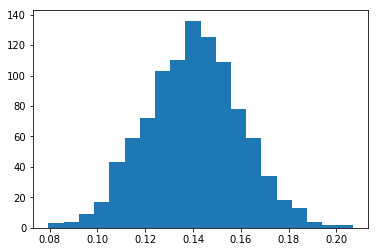

In [64]:
ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size=n_interacoes)
plt.hist(ebitda_margin_dist, bins=20)
plt.show()

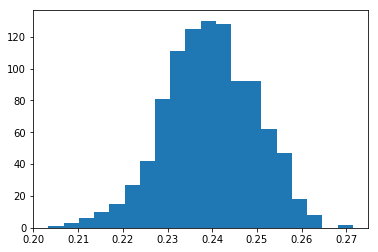

In [65]:
nwc_rate_dist = np.random.normal(loc=0.24, scale=0.01, size=n_interacoes)
plt.hist(nwc_rate_dist, bins=20)
plt.show()

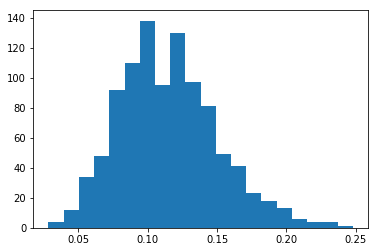

In [66]:
wacc_dist = np.random.beta(9, 70, size=n_interacoes)
plt.hist(wacc_dist, bins=20)
plt.show()

In [67]:
receita = pd.Series(index=anos)
receita['2022'] = 0
receita['2023'] = 10000000
for ano in range(2, 6):
    receita[ano] = 0 

receita

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


2022           0.0
2023    10000000.0
2024           0.0
2025           0.0
2026           0.0
2027           0.0
dtype: float64

Gerando as distribuições de probabilidades

In [246]:
n_interacoes = 2000

cresc_tx_dist = np.random.normal(loc=0.06, scale=0.02, size=n_interacoes)
ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size=n_interacoes)
nwc_tx_dist = np.random.normal(loc=0.2, scale=0.01, size=n_interacoes)
depr_tx_dist = np.random.normal(loc=0.005, scale=0.001, size=n_interacoes)
amort_tx_dist = np.random.normal(loc=0.004, scale=0.002, size=n_interacoes)
capex_tx_dist = np.random.normal(loc=0.001, scale=0.0005, size=n_interacoes)
tx_imposto_dis = np.random.lognormal(mean = -5/2, sigma=1/8, size=n_interacoes)
wacc_dist = np.random.beta(9, 70, size=n_interacoes)

In [247]:
def VPL_FCD(investimento):
    
    # Calculando fluxo de caixa

    distribuicao= list()
    for i in range(n_interacoes):
        for ano in range(2, 6):
            receita[ano] = receita[ano - 1] * (1 + cresc_tx_dist[0])
            # print(receita)
        ebitda = receita * ebitda_margin_dist[i]
        depreciacao = (receita *depr_tx_dist[i])
        amortizacao = (receita*amort_tx_dist[i])
        ebit = ebitda - depreciacao - amortizacao
        nwc = receita * nwc_tx_dist[i]
        var_nwc = nwc.shift(1) - nwc 

        capex = -(receita*capex_tx_dist[i])
        impostos = -(ebit*tx_imposto_dis[i])
        impostos = impostos.apply(lambda x: min(x, 0))

        fluxo_de_caixa = ebit + depreciacao + amortizacao + impostos + capex + var_nwc 
        fluxo_de_caixa[0]=- investimento
        # print(fluxo_de_caixa)

        vpl = npf.npv(float(wacc_dist[i]), fluxo_de_caixa)
        distribuicao.append(vpl)
    
    return distribuicao

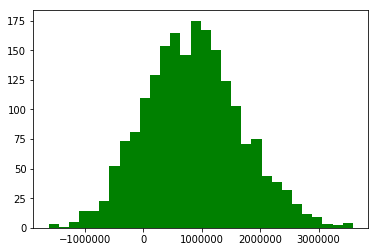

In [248]:
plt.hist(VPL_FCD(investimento=I), bins=30, color='green')
plt.show()

In [249]:
VPL_S = VPL_FCD(investimento=I)
mean(VPL_S)

851715.5178305848

### Benefícios sociais esperados

O desgaste de pneus causa um grande número de acidentes de trânsito, são componentes importantes dos automóveis. Espera-se que o resultado do projeto possa discriminar o desenpenho dos pneus, e portanto melhores métricas de uniformidade dos pneus. 

### Benefícios ambientais esperados 


Espera-se que com projeto o tempo de vida útil dos pneus aumentem, e portanto o número de pneus inservíveis que são descartados na natureza anualmente diminuam.

### Benefícios econômicos esperados 

Segungo a Pirelli, os pneus contribuem em até 20% do consumo total de um carro e em até 35% de um caminhão em média. Espera-se que com projeto o processo de manufatura alcance melhores métricas de desempenho da uniformidade do pneu. Isso vai possibilitar menores consumos de combustível. 